In [195]:
import math
from matplotlib import cm
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
import random

In [56]:
class Stack:
    """
    Class attributes:
    stack    # The array for the stack.
    top      # The index of the top of the stack.
    numElems # The number of elements in the stack.
    """

    """
    __init__ function to initialize the Stack.
    Note: intially the size of the stack defaults to 3.
    Note: the stack is initally filled with None values.
    Note: since nothing is on the stack, top is -1.
    """

    def __init__(self, size=3):
        self.stack = [None for x in range(0, size)]
        self.top = -1
        self.numElems = 0
        return

    """
    __repr__ function to print the stack.
    """

    def __repr__(self):
        s = '[ ' + ', '.join(map(str, self.stack)) + ' ]\n'
        s += ('Top: %d' % self.top) + '\n'
        s += ('numElems: %d' % self.numElems) + '\n'
        return s

    """
    isFull function to check if the stack is full.
    """

    def isFull(self):
        if self.numElems == len(self.stack):
            return True
        else:
            return False

    """
    isEmpty function to check if the stack is empty.
    """

    def isEmpty(self):
        if self.numElems == 0:
            return True
        else:
            return False

    """
    resize function to resize the stack by doubling its size.
    """

    def resize(self):
        n = len(self.stack)
        for i in range(n):
            self.stack += [None]
        return self.stack

    """
    push function to push a value onto the stack.
    """

    def push(self, val):

        if self.isFull() == True:
            self.resize()

        self.stack[self.numElems] = val
        self.numElems += 1
        self.top += 1
        return

    """
    pop function to pop the value off the top of the stack.
    """

    def pop(self):

        if self.numElems >= 1:
            out = self.stack[self.numElems - 1]
            self.stack[self.numElems - 1] = None
            self.numElems -= 1
            self.top -= 1

            return out
        return

In [5]:
class Node:
    """
    Class attributes:

    rank    # The rank of this node.
    neigh   # The list of neighbors in the original graph.
    neighST # The list of neighbors IN THE SPANNING TREE (ST).
    onPath  # A flag to check if the node is already on the path.
    inST    # A flag to check if the node is already in the ST.
    prev    # The previous node on the path.
    """

    """
    __init__ function to initialize the node.
    """

    def __init__(self, rank):
        self.rank = rank  # Set the rank of this node.
        self.neigh = []  # Set the graph neighbors.
        self.neighST = []  # Set the ST neighbors.
        self.onPath = False  # Not on the path yet.
        self.inST = False  # Not in the ST yet.
        self.prev = None  # No previous node on path yet.
        return

    """
    __repr__ function to print a node.
    Note: only prints the rank!
    """

    def __repr__(self):
        return 'Rank: %d' % self.rank

    """
    isEqual function compares this Node to an input Node object.
    Note: only needs to compare the rank!
    """

    def isEqual(self, node):
        return self.rank == node.rank


################################################################################

"""
wilson function performs Wilson's algorithm to uniformly generate a random
spanning tree for an input graph, input as an adjacency list of Node objects.
"""


def wilson(graph):
    # Create a list of ranks and randomly shuffle them.
    # Note: we don't want to shuffle the actual adjacency list because
    #       a Node's index corresponds to its rank...
    randNodesToVisit = list(range(len(graph)))
    random.shuffle(randNodesToVisit)

    # Now put the first randomly selected Node in the ST.
    graph[randNodesToVisit[0]].inST = True

    # Loop over all of the nodes in random order.
    for ind in randNodesToVisit:
        # Set the currNode to visit.
        currNode = graph[ind]

        # If this node is already in the ST, move along.
        if currNode.inST:
            continue

        # Start the path with this node, and reset its prev value.
        currNode.onPath = True
        currNode.prev = None

        # While the current node has not yet reached our ST...
        while not currNode.inST:
            # Choose a random neighbor of the node.
            r = random.randint(0, len(currNode.neigh) - 1)
            nextNode = currNode.neigh[r]

            # Check if this next node is already on the path (and so
            # would create a loop if visited again).
            if not nextNode.onPath:
                # No loop, add to path and move on.
                nextNode.onPath = True
                nextNode.prev = currNode
                currNode = nextNode
            else:
                # Remove the loop by deleting this part of the path.
                while not currNode.isEqual(nextNode):
                    currNode.onPath = False
                    currNode = currNode.prev

        # Now currNode is in the spanning tree, and the chain of prev
        # values can all be added to the spanning tree as well.
        while currNode.prev is not None:
            currNode.inST = True
            currNode.onPath = False
            currNode.neighST.append(currNode.prev)
            currNode.prev.neighST.append(currNode)
            currNode = currNode.prev

        # Back at the start of the path.
        # Add to spanning tree.
        # Remove from the path.
        currNode.inST = True
        currNode.onPath = False

    return


################################################################################

"""
createRandMaze function will use Wilson's algorithm to generate a random maze
of the spcified size given as number of rooms per side of the maze. The returned
maze will have a row/column size of 2*numRooms+1.
"""


def createRandMaze(numRooms=12):
    # Create an adjacency list with numRooms^2 number of Nodes.
    graph = []
    for rank in range(numRooms ** 2):
        graph.append(Node(rank))

    # Now add the edges to the graph (i.e., fill out the neigh lists).
    for currNode in graph:
        # Get the current rank.
        r = currNode.rank

        # Fill the 'north' neighbor.
        if r >= numRooms:
            currNode.neigh.append(graph[r - numRooms])

        # Fill the 'south' neighbor.
        if r <= numRooms ** 2 - 1 - numRooms:
            currNode.neigh.append(graph[r + numRooms])

        # Fill the 'west' neighbor.
        if r % numRooms != 0:
            currNode.neigh.append(graph[r - 1])

        # Fill the 'east' neighbor.
        if r % numRooms != numRooms - 1:
            currNode.neigh.append(graph[r + 1])

    # Now that the graph is created, run Wilson's to get the spanning tree.
    wilson(graph)

    # Store the maze size.
    mazeSize = 2 * numRooms + 1

    # Create our initial, filled 'maze', which will be represented as a list
    # of lists filled with 0 (room/hallway) or 1 (wall).
    maze = [[1 for x in range(mazeSize)] for y in range(mazeSize)]

    # Now loop over each node in the graph, open the corresponding room in
    # the maze, and open any hallways leading out of the room.
    for node in graph:
        # Get the node's ROOM row and column indices.
        roomRow = node.rank // numRooms
        roomCol = node.rank % numRooms

        # Convert these room indices into indices in the full maze,
        # noting that the maze is lined with walls, and rooms have
        # walls between them.
        mazeRow = 2 * roomRow + 1
        mazeCol = 2 * roomCol + 1

        # Open this room in the maze.
        maze[mazeRow][mazeCol] = 0

        # Now look at this node's spanning tree neighbors.
        for nNode in node.neighST:
            # Check which hallways to open.
            if nNode.rank > node.rank + 1:
                # Open southern hallway.
                maze[mazeRow + 1][mazeCol] = 0
            elif nNode.rank > node.rank:
                # Open eastern hallway.
                maze[mazeRow][mazeCol + 1] = 0
            elif nNode.rank >= node.rank - 1:
                # Open western hallway.
                maze[mazeRow][mazeCol - 1] = 0
            else:
                # Open northern hallway.
                maze[mazeRow - 1][mazeCol] = 0

    # Now the interior maze has been created. Add the start and end.
    maze[0][1] = 0
    maze[mazeSize - 1][mazeSize - 2] = 0

    # Return the completed maze.
    return maze

In [103]:
class Vertex:
    """
    Class attributes:

    rank    # The rank of this node.
    neigh   # The list of neighbors.
    dist    # The distance from start.
    visited # Flag whether vertex has been visited.
    prev    # The previous vertex in the path.
    """

    """
    __init__ function to initialize the vertex.
    """

    def __init__(self, rank):
        self.rank = rank  # Set the rank of this vertex.
        self.neigh = []  # Set the input neighbors.
        self.dist = math.inf  # Infinite dist initially.
        self.visited = False  # Nothing visited at initialization.
        self.prev = None  # No previous node on path yet.
        return

    """
    __repr__ function to print a vertex.
    Note: only prints the rank!
    """

    def __repr__(self):
        return '%d' % self.rank

    """
    isEqual function compares this Vertex to an input Vertex object.
    Note: only needs to compare the rank!
    """

    def isEqual(self, vertex):
        return self.rank == vertex.rank

In [10]:
class Maze:
    """
    Class attributes:

    maze    # The 2D list representing the maze.
    adjList # The adjacency list of Vertex objects.
    adjMat  # The adjacency matrix, 2D list.
    start   # The start Vertex object.
    exit    # The exit Vertex object.
    path    # The path from start to exit, list of ranks.
    verb    # A flag to control printing. False prints less.
    """

    """
    __init__ function to initialize the maze.

    INPUTS
    mazeNum:   which maze to select.
    verbosity: a flag to control printing, where False prints less.
    numRooms:  if mazeNum=4, then set the size of the maze, which will
               be 2*numRooms+1.
    """

    def __init__(self, mazeNum=0, verbosity=False, numRooms=12):

        # Select the maze to use.
        self.maze = getMaze(mazeNum, numRooms)

        # Create an adjacency list of empty vertices.
        self.adjList = [Vertex(r) for r in \
                        range(0, len(self.maze) * len(self.maze[0]))]

        # Initialize the adjacency matrix to have no edges yet.
        self.adjMat = [[0 for x in self.adjList] for y in self.adjList]

        # Now loop through the maze and update adjacencies.
        # In this loop, maze[r][c] will correspond to vertex rank:
        #     r*len(maze[0])+c
        # Note: we skip the first and last row/col.
        for r in range(1, len(self.maze) - 1):
            for c in range(1, len(self.maze[r]) - 1):
                # Note that maze[r][c] will now be a 0 or a 1.
                # If it is 0, then open space and needs adjacency.
                # If it is 1, then wall and no adjacency.
                if self.maze[r][c] == 0:
                    # If up is open, it is a neighbor.
                    if self.maze[r - 1][c] == 0:
                        # Append the neighbor to the neigh list.
                        self.adjList[r * len(self.maze[0]) + c].neigh.append( \
                            self.adjList[(r - 1) * len(self.maze[0]) + c])

                        # Update the correct entry in the adjMat.
                        self.adjMat[r * len(self.maze[0]) + c] \
                            [(r - 1) * len(self.maze[0]) + c] = 1

                    # If down is open, it is a neighbor.
                    if self.maze[r + 1][c] == 0:
                        # Append the neighbor to the neigh list.
                        self.adjList[r * len(self.maze[0]) + c].neigh.append( \
                            self.adjList[(r + 1) * len(self.maze[0]) + c])

                        # Update the correct entry in the adjMat.
                        self.adjMat[r * len(self.maze[0]) + c] \
                            [(r + 1) * len(self.maze[0]) + c] = 1

                    # If left is open, it is a neighbor.
                    if self.maze[r][c - 1] == 0:
                        # Append the neighbor to the neigh list.
                        self.adjList[r * len(self.maze[0]) + c].neigh.append( \
                            self.adjList[r * len(self.maze[0]) + c - 1])

                        # Update the correct entry in the adjMat.
                        self.adjMat[r * len(self.maze[0]) + c] \
                            [r * len(self.maze[0]) + c - 1] = 1

                    # If right is open, it is a neighbor.
                    if self.maze[r][c + 1] == 0:
                        # Append the neighbor to the neigh list.
                        self.adjList[r * len(self.maze[0]) + c].neigh.append( \
                            self.adjList[r * len(self.maze[0]) + c + 1])

                        # Update the correct entry in the adjMat.
                        self.adjMat[r * len(self.maze[0]) + c] \
                            [r * len(self.maze[0]) + c + 1] = 1

        # Find the start in the top row and exit in the bottom row.
        # Update their info in the adjList and adjMat.
        # Note: start's only neighbor is down and exit's is up.
        for ind in range(0, len(self.maze[0])):
            if self.maze[0][ind] == 0:
                self.start = self.adjList[ind]
                self.start.neigh = [self.adjList[ind + len(self.maze[0])]]
                self.adjMat[ind][ind + len(self.maze[0])] = 1
                break
        for ind in range(0, len(self.maze[len(self.maze) - 1])):
            if self.maze[len(self.maze) - 1][ind] == 0:
                self.exit = \
                    self.adjList[ind + (len(self.maze) - 1) * len(self.maze[0])]
                self.exit.neigh = [self.adjList[ind + \
                                                (len(self.maze) - 2) * len(self.maze[0])]]
                self.adjMat[self.exit.rank] \
                    [self.exit.rank - len(self.maze[0])] = 1
                break

        # Set the path to be empty.
        self.path = []

        # Set verbosity.
        self.verb = verbosity
        return

    """
    __repr__ function to print the maze.
    """

    def __repr__(self):
        # Get the string.
        (warn, mp) = self.printMaze()

        # Return the string for printing.
        if self.verb:
            return warn + mp
        else:
            return warn

    """
    printMaze function for providing error messages and printing used in repr.
    """

    def printMaze(self):
        # Create the output strings.
        # mp is the string for the maze itself.
        # warn is the string for any warnings/errors!
        mp = ''
        warn = ''

        # Loop through the rows and cols of the maze and fill in 'X' for a wall
        # and ' ' for an open space. Put line breaks between rows.
        for r in range(0, len(self.maze)):
            for c in range(0, len(self.maze)):
                if self.maze[r][c] == 0:
                    mp += ' '
                else:
                    mp += 'X'
            mp += '\n'

        # Mark the start with 's' and the end with 'e'.
        # Note the shift due to the line break symbols.
        # Note that each line break '\n' counts as 1 char...
        mp = mp[0:self.start.rank] + 's' + \
             mp[self.start.rank + 1:self.exit.rank + len(self.maze) - 1] + \
             'e' + mp[self.exit.rank + len(self.maze):]

        # If the path is not empty, fill it in.
        # Check to make sure it is a correct and valid path.
        if len(self.path) > 0:

            # Not an invalid path yet...
            invalid = False

            # Needs to start at start and end at end.
            if self.path[0] != self.start.rank:
                warn += 'Path does not begin at start!\n'
                invalid = True
                mp = mp[0:self.start.rank + self.start.rank // len(self.maze[0])] + \
                     '!' + \
                     mp[self.start.rank + self.start.rank // len(self.maze[0]) + 1:]
            if self.path[len(self.path) - 1] != self.exit.rank:
                warn += 'Path does not exit the maze!\n'
                invalid = True
                mp = mp[0:self.exit.rank + self.exit.rank // len(self.maze[0])] + \
                     '!' + \
                     mp[self.exit.rank + self.exit.rank // len(self.maze[0]) + 1:]

            # Loop through the path and fill it in.
            # Check for invalid ghosts and repeats.
            for vertex in self.path:
                # Skip the start and end.
                if (vertex != self.start.rank) and (vertex != self.exit.rank):
                    # Check if it is a wall or opening. Fill if open.
                    # Also check if already visited.
                    if mp[vertex + vertex // len(self.maze[0])] == 'X':
                        warn += 'No ghosts! Do not walk through walls!\n'
                        invalid = True
                        mp = mp[0:vertex + vertex // len(self.maze[0])] + 'G' + \
                             mp[vertex + vertex // len(self.maze[0]) + 1:]
                    elif mp[vertex + vertex // len(self.maze[0])] == 'o':
                        warn += 'You have already been to this vertex...\n'
                        invalid = True
                        mp = mp[0:vertex + vertex // len(self.maze[0])] + 'R' + \
                             mp[vertex + vertex // len(self.maze[0]) + 1:]
                    elif mp[vertex + vertex // len(self.maze[0])] == 'G':
                        warn += 'Repeated ghosts!\n'
                    elif mp[vertex + vertex // len(self.maze[0])] == 'R':
                        warn += 'Repeating again!\n'

                    else:
                        mp = mp[0:vertex + vertex // len(self.maze[0])] + 'o' + \
                             mp[vertex + vertex // len(self.maze[0]) + 1:]

            # Loop through the path to make sure that each neighbor is actually
            # a neighbor...
            for vInd in range(0, len(self.path) - 1):
                if (self.adjMat[self.path[vInd]][self.path[vInd + 1]] != 1) \
                        and (self.path[vInd] != self.path[vInd + 1]):
                    warn += 'Not a neighbor! You cannot teleport!\n'
                    invalid = True

            # If we had an invalid path, print that fact.
            if invalid:
                warn += '\nPath is invalid!\n\n'
            else:
                warn += '\nMAZE SOLVED!!!\n\n'

        return (warn, mp)

    """
    printList function for cleanly printing the adjaceny list.
    Note: skips vertices with no neighbors.
    """

    def printList(self):
        for vertex in self.adjList:
            if len(vertex.neigh) > 0:
                print('Rank: %d' % vertex.rank)
                print('Neighbors:')
                print(vertex.neigh)
                print('')
        return

    """
    printMat function for cleanly printing the adjaceny matrix.
    Note: for the larger mazes, this will still likely be hard to read.
    """

    def printMat(self):
        for row in self.adjMat:
            print(row)
        return

    """
    plot_maze_solution function for cleanly plotting your final path.
    Note: set plotting to False to supress figure generation.
    """

    def plot_maze_solution(self, plotting=True):
        if self.verb == False:
            return
        (warn, mp) = self.printMaze()
        np_mz = []
        row_mz = []
        possible_value = ['X', ' ', 'o', 's', 'e', 'G', 'R']
        for i in mp:
            if i == '\n':
                np_mz += [row_mz]
                row_mz = []
                continue
            if i == '!':
                i = 'e'
            row_mz += [possible_value.index(i) / 6.]
        viridis = cm.get_cmap('viridis', 6)
        newcolors = viridis(np.linspace(0, 1, 6))
        newcolors[0, :] = np.array([0, 0, 1, 1])
        newcolors[1, :] = np.array([1, 1, 1, 1])
        newcolors[3, :] = np.array([0.7, 0.7, 0.7, 1])
        newcolors[4, :] = np.array([0, 1, 0, 1])
        newcolors[5, :] = np.array([1, 0, 0, 1])
        newcmp = ListedColormap(newcolors)
        plt.figure(figsize=(4, 4))
        fig = plt.imshow(np_mz, cmap=newcmp)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        if plotting:
            plt.show()

    """
    solve function calls implemented bdfs using the input alg.
    Note: set verbosity to False to supress printing out the resulting maze/path.
    Note: set plotting to False to supress figure generation.
    """

    def solve(self, alg, verbosity=True, plotting=True):
        self.path = bdfs(self, alg)
        if len(self.path) == 0:
            print('Maze not solved!\n')
        self.verb = verbosity
        print(self)
        self.plot_maze_solution(plotting)
        return


################################################################################

"""
getMaze function will provide the 2D array representing the maze to the Maze
class's __init__ function.

INPUTS
mazeNum:  which maze to select
numRooms: the number of rooms in the maze, only for mazeNum=4
          Note: the size of the maze is 2*numRooms+1 in each dimension

OUTPUTS
maze: a 2D list representing the maze
"""


def getMaze(mazeNum=0, numRooms=12):
    # Select the maze to use.
    if mazeNum == 0:
        maze = [[1, 1, 0, 1, 1], \
                [1, 0, 0, 0, 1], \
                [1, 0, 0, 0, 1], \
                [1, 0, 0, 0, 1], \
                [1, 1, 0, 1, 1], ]
    elif mazeNum == 1:
        maze = [[1, 1, 0, 1, 1], \
                [1, 0, 0, 0, 1], \
                [1, 0, 1, 1, 1], \
                [1, 0, 0, 0, 1], \
                [1, 1, 0, 1, 1], ]
    elif mazeNum == 2:
        maze = [[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], \
                [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], \
                [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], \
                [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], \
                [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], \
                [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], \
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], \
                [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1], \
                [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1], \
                [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1], \
                [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], \
                [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], \
                [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1], \
                [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1], \
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1], \
                [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1], \
                [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1], \
                [1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], \
                [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], \
                [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], \
                [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], \
                [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1], \
                [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
    elif mazeNum == 3:
        maze = [[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \
                [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \
                [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \
                [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \
                [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \
                [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], \
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \
                [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
    elif mazeNum == 4:
        maze = createRandMaze(numRooms)
    else:
        raise Exception('Input mazeNum not valid!')

    return maze

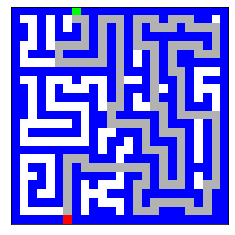

[7,
 32,
 33,
 58,
 83,
 108,
 107,
 106,
 105,
 130,
 155,
 156,
 157,
 158,
 159,
 160,
 135,
 110,
 85,
 60,
 35,
 36,
 37,
 62,
 87,
 112,
 137,
 162,
 187,
 212,
 237,
 262,
 287,
 286,
 311,
 336,
 337,
 338,
 339,
 340,
 365,
 390,
 415,
 416,
 417,
 442,
 467,
 492,
 517,
 518,
 519,
 494,
 469,
 444,
 419,
 394,
 369,
 368,
 367,
 342,
 317,
 292,
 291,
 266,
 241,
 216,
 191,
 166,
 141,
 116,
 115,
 114,
 89,
 64,
 39,
 40,
 41,
 66,
 67,
 68,
 43,
 44,
 45,
 70,
 71,
 72,
 73,
 98,
 123,
 148,
 147,
 146,
 121,
 120,
 119,
 118,
 143,
 168,
 193,
 194,
 219,
 244,
 269,
 294,
 319,
 320,
 321,
 322,
 323,
 348,
 373,
 398,
 423,
 448,
 473,
 498,
 523,
 522,
 547,
 572,
 597,
 596,
 595,
 570,
 569,
 568,
 567,
 566,
 591,
 590,
 589,
 564,
 539,
 514,
 515,
 490,
 465,
 464,
 463,
 462,
 461,
 460,
 459,
 458,
 433,
 432,
 431,
 456,
 481,
 506,
 531,
 556,
 581,
 606]

In [203]:
# Step 1: Initialize and Set Flags to False
m = Maze(2,verbosity = True)
for vertex in m.adjList:
    vertex.visited = False
    vertex.prev = None

# Step 2: Set Start Visited Flag to True, Push start to stack
m.start.visited = True
stack = Stack()
stack.push(m.start)

# Step 3:
while stack.numElems > 0:
    current = stack.pop()
    for neighbor in current.neigh:
        if neighbor.visited == False:
            neighbor.visited = True
            stack.push(neighbor)
            neighbor.prev = current
            if neighbor == m.exit:
                break
 
last = m.exit
m.path.append(m.exit.rank)
while last != m.start:
    m.path.append(last.prev.rank)
    last = last.prev
m.path = m.path[::-1]
m.plot_maze_solution()
m.path

In [ ]:
def bdfs(maze, alg):
    # If the alg is not BFS or DFS, raise exception.
    if (alg != 'BFS') and (alg != 'DFS'):
        raise Exception('Incorrect alg! Need BFS or DFS!')

    # Depth First Search
    if alg == 'DFS':
        
        # Step 1: Initialize and Set Flags to False
        m = maze
        for vertex in m.adjList:
            vertex.visited = False
            vertex.prev = None

        # Step 2: Set Start Visited Flag to True, Push start to stack
        m.start.visited = True
        stack = Stack()
        stack.push(m.start)

        # Step 3:
        while stack.numElems > 0:
            current = stack.pop()
            for neighbor in current.neigh:
                if neighbor.visited == False:
                    neighbor.visited = True
                    stack.push(neighbor)
                    neighbor.prev = current
                    if neighbor == m.exit:
                        break
 
        last = m.exit
        m.path.append(m.exit.rank)
        while last != m.start:
            m.path.append(last.prev.rank)
            last = last.prev
        m.path = m.path[::-1]
        
    
    return []
    ##### Your implementation goes here. #####